<a href="https://colab.research.google.com/github/insyspo/iss2024/blob/main/Innovation_and_knowledge_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob

from google.colab import drive
drive.mount('/content/drive/')
folder = '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/'

Mounted at /content/drive/


In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import unidecode
import numpy as np
import pandas_gbq

In [ ]:
files = glob.glob(folder+'*.xls*')
files

['/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/PIB dos Municípios - base de dados 2010-2021.xlsx',
 '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/PIB dos Municípios - base de dados 2002-2009.xls',
 '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/resultlist2.xlsx',
 '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/resultlist4.xlsx',
 '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/resultlist3.xlsx',
 '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/resultlist1.xlsx',
 '/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/municipios.xls']

# Municípios

In [ ]:
T = pd.read_excel('/content/drive/My Drive/Colaboração/Innovation economics - Juan/data/municipios.xls',skiprows=6)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [ ]:
cods = T.iloc[:,-2]
nomes = T.iloc[:,-1]

In [ ]:
nomes_red = [unidecode.unidecode(n.lower()) for n in nomes]

In [ ]:
municip = pd.DataFrame({'cod':cods,'nome':nomes,'clean_name':nomes_red})
municip.to_gbq(project_id='insyspo',if_exists='replace',destination_table='userdb_alysson_mazoni.municip')

100%|██████████| 1/1 [00:00<00:00, 1020.26it/s]


# PIB dos municípios

In [ ]:
files = glob.glob(folder+'PIB*.xls*')
gdp = pd.read_excel(files[0])
for f in files[1:]:
  gdpi = pd.read_excel(f)
  gdp = pd.concat((gdp,gdpi))

gdp.shape

(111326, 43)

In [ ]:
np.min(gdp['Ano'])

2002

In [ ]:
GDP = gdp[['Ano','Código do Município','Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)','Produto Interno Bruto, \na preços correntes\n(R$ 1.000)']]
GDP.columns = ['ano','cod_mun','VAB','PIB']
GDP.loc[:,'P'] = GDP.loc[:,'VAB']/GDP.loc[:,'PIB']
GDP.to_gbq(project_id = 'insyspo',
           destination_table='userdb_alysson_mazoni.gdp_mun_ano',
           if_exists='replace')
GDP.head()

<ipython-input-15-a4be474d03c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDP.loc[:,'P'] = GDP.loc[:,'VAB']/GDP.loc[:,'PIB']
100%|██████████| 1/1 [00:00<00:00, 700.22it/s]


,ano,cod_mun,VAB,PIB,P
0,2010,1100015,241119.767,262076.878,0.920034
1,2010,1100023,1199664.227,1364693.780,0.879072
2,2010,1100031,65400.772,69611.114,0.939516
3,2010,1100049,1041212.374,1186494.091,0.877554
4,2010,1100056,192454.160,222021.189,0.866828


# Patents

In [ ]:
files = glob.glob(folder+'result*.xlsx')
pats = pd.read_excel(files[0])
for f in files[1:]:
  patsi = pd.read_excel(f)
  pats = pd.concat((pats,patsi))

del(patsi)

pats.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Publication,Publication date,IPC1-7 further and additional,IPC 1-7 main,CPC (invention information),Inventor,Inventor (city),Inventor (country),Applicant / Proprietor,Applicant / Proprietor (city),...,Abstract (en),Patent citation (examination phase),Priority,Priority date,International application,International application date,IPC (additional information),IPC (invention information),CPC (additional information),C-Set
0,EP 2957498 B1 20180613,20180613,NaN,NaN,NaN,"Carneiro, Pedro Paulo Fatorelli",CEP-29101-016 Praia da Costa-Vila Velha ES,BR,"Carneiro, Pedro Paulo Fatorelli",CEP-29101-016 Praia da Costa-Vila Velha ES,...,NaN,WO 2010146567 A1\nDE 10023436 A1\nDE 19603998 ...,BR 102012031119 20121206,20121206,BR2013000032 20130123 (pt),20130123.0,NaN,B63B 25/02 (2006.01)\nB65D 90/10 (2006.01)\nB6...,NaN,NaN
1,EP 2957770 A1 20151223,20151223,NaN,NaN,NaN,"Schwarz, Marcos Guilherme\nGuolo Nazario, Filipe",89221-103 Joinville SC\n89218-000 Joinville Sa...,BR\nBR,Whirlpool S.A.,04578-000 São Paulo - SP,...,Control system for hermetic cooling compressor...,NaN,BR PI1100026 20110126,20110126,NaN,NaN,NaN,F04B 35/04 (2006.01)\nF04B 49/02 (2006.01)\nF0...,NaN,NaN
2,EP 2957845 A1 20151223,20151223,NaN,NaN,NaN,"FERREIRA, Luiz Afranio Alves\nHECK, Emerson\nD...",89223-392 Joinville\n89218-060 Joinville\n8921...,BR\nBR\nBR,Whirlpool S.A.,04578-000 São Paulo SP,...,The present invention refers to the technologi...,NaN,BR 102014013430 20140603,20140603,NaN,NaN,NaN,F25D 27/00 (2006.01),NaN,NaN
3,EP 2959153 A1 20151230,20151230,NaN,NaN,NaN,"AMARAL, Tadeu Miguel Malagó\nBUENO, Ricardo Ro...",02611-003 São Paulo - SP\n13232-204 São Paulo ...,BR\nBR\nBR,Mahle Metal Leve S.A.,13846-146 São Paulo,...,NaN,NaN,BR 102013004382 20130225,20130225,BR2014000066 20140225 (en),20140225.0,NaN,F02M 31/14 (2006.01)\nF02D 19/08 (2006.01),NaN,NaN
4,EP 2959329 A1 20151230,20151230,NaN,NaN,NaN,"KRELING, Afonso\nRAMOS TORRES, Fabiola\nBAILLO...",27255-080 Rio De Janeiro\n27514-230 Rio De Jan...,BR\nBR\nBR\nUS\nUS,Guardian do Brasil Vidros Planos Ltda.\nGuardi...,"27570-000 Rio De Janeiro\nAuburn Hills, MI 483...",...,NaN,NaN,US 201313770262 20130219,20130219,US2014017043 20140219 (en),20140219.0,NaN,G02B 5/08 (2006.01),NaN,NaN


In [ ]:
pats_cities = list(pats['Applicant / Proprietor (city)'])
pats_years = list(pats['Priority date'])
npats = [0]*len(nomes_red)
syear = 2002
eyear = 2024
ypats = np.zeros((len(nomes_red),(eyear-syear+1)))
connsa = []
connsb = []
for c,y in zip(pats_cities,pats_years):
  if type(y)==str:
    yn = int(y.split('\n')[0])//10000
  else:
    yn = y//10000
  clean_name = unidecode.unidecode(str(c).lower())
  clean_names = clean_name.split('\n')
  cities_conns = []
  for cn in clean_names:
    for i,n in enumerate(nomes_red):
        # print(n,cn)
        if n in cn:
          npats[i] += 1
          ypats[i,yn-syear] += 1
          cities_conns.append(cods[i])
  if len(clean_names)>1:
    for ia, cca in enumerate(cities_conns[:-1]):
      for ib, ccb in enumerate(cities_conns[ia+1:]):
        connsa.append(cca)
        connsb.append(ccb)


In [ ]:
total_pats_cities = pd.DataFrame(ypats,columns=[str(i) for i in range(syear,eyear+1)],index=list(cods))
total_pats_cities['cod']=total_pats_cities.index

In [ ]:
total_pats = pd.wide_to_long(total_pats_cities,'',i='cod',j='year')
total_pats.columns = ['patents']
total_pats.to_gbq(project_id='insyspo',
                  destination_table='userdb_alysson_mazoni.patents_cities_yearly',
                  if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6213.78it/s]


In [ ]:
%%bigquery df --project=insyspo

SELECT a.year, SUM(a.patents) AS patents
FROM userdb_alysson_mazoni.patents_cities_yearly AS a
#JOIN userdb_alysson_mazoni.municip AS b
#ON a.cod = b.cod
WHERE a.year<2022
GROUP BY a.year

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='year'>

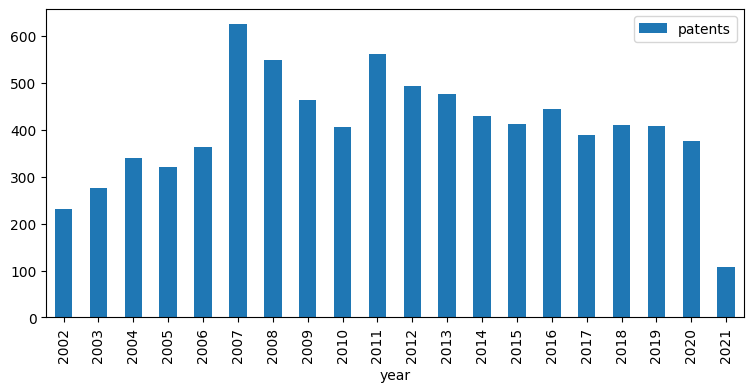

In [ ]:
df.plot.bar(x='year',figsize=(9,4))

In [ ]:
pats_conns = pd.DataFrame({'city_a':connsa,'city_b':connsb})
pats_conns.to_gbq(project_id='insyspo',if_exists='replace',destination_table='userdb_alysson_mazoni.pats_conns')

pats_cities = pd.DataFrame({'city':cods,'patents':npats})

100%|██████████| 1/1 [00:00<00:00, 723.41it/s]


In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.pats_connections;
CREATE TABLE insyspo.userdb_alysson_mazoni.pats_connections AS (
  SELECT city_a, city_b, COUNT(*) AS pats
  FROM insyspo.userdb_alysson_mazoni.pats_conns
  WHERE city_a>city_b
  GROUP BY city_a, city_b
);

Query is running:   0%|          |

""


In [ ]:
%%bigquery patents --project=insyspo
SELECT city_a, city_b, pats AS works
FROM insyspo.userdb_alysson_mazoni.pats_connections

Query is running:   0%|          |

Downloading:   0%|          |

# Scholarly works

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_works_cities;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_works_cities AS (
  SELECT DISTINCT a.id, a.doi, c.city, a.publication_year
  FROM `insyspo.publicdb_openalex_2024_04_rm.works` AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_authorships` AS b
  ON a.id = b.work_id
  JOIN `insyspo.publicdb_openalex_2024_04_rm.institutions` AS c
  ON b.institution_id = c.id
  WHERE c.country_code = 'BR' AND a.publication_year>=2002
);

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_works_cities_yearly;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_works_cities_yearly AS (
  SELECT city, publication_year, COUNT(*) AS works
  FROM insyspo.userdb_alysson_mazoni.br_works_cities
  GROUP BY city, publication_year
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery df --project=insyspo

SELECT publication_year AS year,
 SUM(works) AS works,
FROM insyspo.userdb_alysson_mazoni.br_works_cities_yearly
WHERE publication_year <2022
GROUP BY publication_year
ORDER BY publication_year

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='year'>

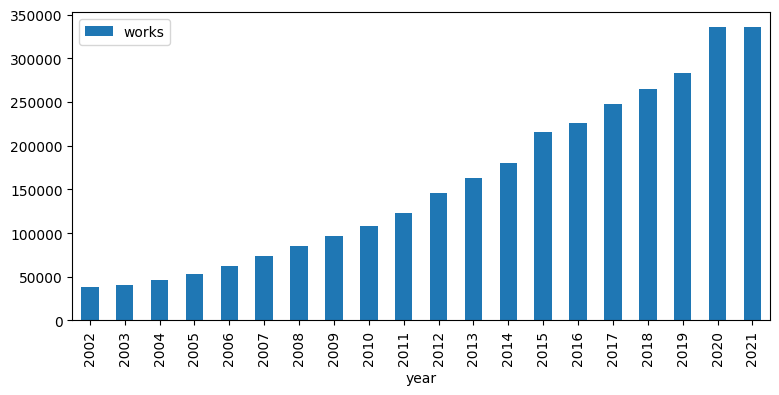

In [ ]:
df.plot.bar(x='year',figsize=(9,4))

In [ ]:
tuples = [tuple(x) for x in df.values]
city = []
for t in tuples:
  nra = unidecode.unidecode(t[0].lower())
  for i,n in enumerate(nomes_red):
    if n == nra:
      city.append(cods[i])
      break

cities = pd.DataFrame({'city':city, 'year': df['publication_year'],
                       'works': df['works']})
cities.to_gbq(project_id = 'insyspo',
               destination_table='userdb_alysson_mazoni.br_works_cods_yearly',
               if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7898.88it/s]


In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_works;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_works AS (
  SELECT DISTINCT a.id, a.doi
  FROM `insyspo.publicdb_openalex_2024_04_rm.works` AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_authorships` AS b
  ON a.id = b.work_id
  JOIN `insyspo.publicdb_openalex_2024_04_rm.institutions` AS c
  ON b.institution_id = c.id
  WHERE c.country_code = 'BR' AND a.publication_year>=2002
);

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_works_cities;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_works_cities AS (
  SELECT DISTINCT a.id, a.doi, c.city, a.publication_year
  FROM `insyspo.publicdb_openalex_2024_04_rm.works` AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_authorships` AS b
  ON a.id = b.work_id
  JOIN `insyspo.publicdb_openalex_2024_04_rm.institutions` AS c
  ON b.institution_id = c.id
  WHERE c.country_code = 'BR' AND a.publication_year>=2002
);

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_collaborations;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_collaborations AS (
  SELECT a.city AS city_a, b.city AS city_b, COUNT(DISTINCT a.id) AS nworks
  FROM insyspo.userdb_alysson_mazoni.br_works_cities AS a
  JOIN insyspo.userdb_alysson_mazoni.br_works_cities AS b
  ON a.id = b.id
  WHERE a.city>b.city
  GROUP BY a.city, b.city
);

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_citations;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_citations AS (
  SELECT DISTINCT a.id, a.doi, b.referenced_work_id
  FROM insyspo.userdb_alysson_mazoni.br_works AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_referenced_works` AS b
  ON a.id = b.work_id
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_referenced_works` AS c
  ON a.id = c.referenced_work_id
);

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.insts_cits;
CREATE TABLE insyspo.userdb_alysson_mazoni.insts_cits AS (
  SELECT b.institution_id AS inst_a, c.institution_id AS inst_b, COUNT(*) AS weight
  FROM insyspo.userdb_alysson_mazoni.br_citations AS a
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_authorships` AS b
  ON a.id = b.work_id
  JOIN `insyspo.publicdb_openalex_2024_04_rm.works_authorships` AS c
  ON a.referenced_work_id = c.work_id
  WHERE b.institution_id > c.institution_id
  GROUP BY b.institution_id, c.institution_id
  ORDER BY weight DESC
);


Query is running:   0%|          |

""


In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS insyspo.userdb_alysson_mazoni.br_works_cities_total;
CREATE TABLE insyspo.userdb_alysson_mazoni.br_works_cities_total AS (
  SELECT city, COUNT(*) AS works
  FROM insyspo.userdb_alysson_mazoni.br_works_cities
  GROUP BY city
)

Query is running:   0%|          |

In [ ]:
%%bigquery df --project=insyspo

SELECT *
FROM insyspo.userdb_alysson_mazoni.br_works_cities_total;

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
tuples = [tuple(x) for x in df.values]
city = []
for t in tuples:
  nra = unidecode.unidecode(t[0].lower())
  for i,n in enumerate(nomes_red):
    if n == nra:
      city.append(cods[i])
      break

cities = pd.DataFrame({'city':city, 'works': df['works']})
cities.to_gbq(project_id = 'insyspo',
               destination_table='userdb_alysson_mazoni.br_works_cods',
               if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6326.25it/s]


In [ ]:
%%bigquery cities --project=insyspo

SELECT city, SUM(works) AS works
FROM insyspo.userdb_alysson_mazoni.br_works_cods
GROUP BY city

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery df --project=insyspo

SELECT *
FROM insyspo.userdb_alysson_mazoni.br_collaborations

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
tuples = [tuple(x) for x in df.values]
city_a = []
city_b = []
for t in tuples:
  #new_ta =
  nra = unidecode.unidecode(t[0].lower())
  nrb = unidecode.unidecode(t[1].lower())
  for i,n in enumerate(nomes_red):
    if n == nra:
      city_a.append(cods[i])
      break
  for i,n in enumerate(nomes_red):
    if n == nrb:
      city_b.append(cods[i])
      break

collabs = pd.DataFrame({'city_a':city_a,'city_b':city_b,'works': df['nworks']})
collabs.to_gbq(project_id = 'insyspo',
               destination_table='userdb_alysson_mazoni.br_collaborations_cods',
               if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7530.17it/s]


# Clustering

In [ ]:
!pip install python-igraph
!pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


In [ ]:
from igraph import Graph
import igraph as ig
import pandas as pd
import leidenalg as la
import numpy as np
import pandas_gbq
import glob
import matplotlib.pyplot as plt

In [ ]:
%%bigquery collabs --project=insyspo

SELECT *
FROM userdb_alysson_mazoni.br_collaborations_cods

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
%%bigquery patents --project=insyspo
SELECT city_a, city_b, pats AS works
FROM insyspo.userdb_alysson_mazoni.pats_connections

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
patents['type'] = 'patent'
collabs['type'] = 'article'

all = pd.concat((patents,collabs),axis=0,ignore_index=True)

In [ ]:
all

,city_a,city_b,works,type
0,4322707,2307106,1,patent
1,3535705,3510401,1,patent
2,2802106,2208502,1,patent
3,4318705,4313409,1,patent
4,4108106,3534401,1,patent
...,...,...,...,...
14820,3548807,5103403,30,article
14821,3549904,3503208,30,article
14822,2933307,3146107,30,article
14823,2933307,2408003,30,article


In [ ]:
all.head()

,city_a,city_b,works,type
0,4322707,2307106,1,patent
1,3535705,3510401,1,patent
2,2802106,2208502,1,patent
3,4318705,4313409,1,patent
4,4108106,3534401,1,patent


In [ ]:
all = all.rename(columns={'works':'weight'})
tuples = [tuple(x) for x in all[['city_a','city_b','weight']].values]
G = ig.Graph.TupleList(tuples, directed = False, edge_attrs = ['weight'])
G.vs['type'] = [a[0]=='a' for a in all['type']]

In [ ]:
all.columns

Index(['city_a', 'city_b', 'weight', 'type'], dtype='object')

In [ ]:
partition = G.community_leiden(resolution=1e-1)

In [ ]:
partition.summary()

'Clustering with 411 elements and 108 clusters'

(array([107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  22.4,  43.8,  65.2,  86.6, 108. , 129.4, 150.8, 172.2,
        193.6, 215. ]),
 <BarContainer object of 10 artists>)

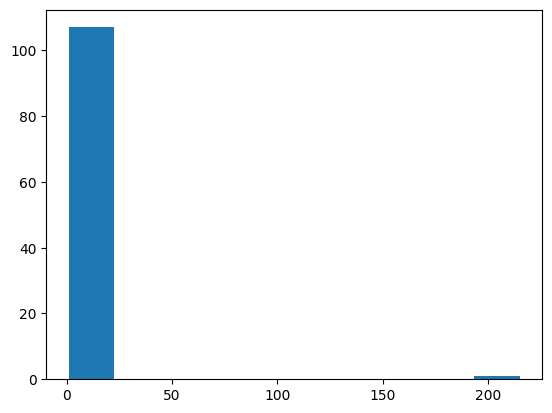

In [ ]:
plt.hist(partition.sizes())

In [ ]:
clusters_table = pd.DataFrame({'node': G.vs['name'],'community': partition.membership})

In [ ]:
clusters_table.to_gbq(
    destination_table = 'userdb_alysson_mazoni.rok',
    project_id='insyspo',
    if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 7219.11it/s]


In [ ]:
%%bigquery --project=insyspo

SELECT a.nome, b.community AS ROK
FROM userdb_alysson_mazoni.municip AS a
JOIN userdb_alysson_mazoni.rok AS b
ON a.cod = b.node
JOIN (
  SELECT rok,
      SUM(patents)+SUM(works) AS p
    FROM userdb_alysson_mazoni.yearly_model_rok
    GROUP BY rok
    HAVING p>1000
    ORDER BY p DESC
) AS c
ON b.community = c.rok

Query is running:   0%|          |

Downloading:   0%|          |

,nome,ROK
0,São Leopoldo,5
1,Novo Hamburgo,5
2,Osasco,5
3,São Paulo,5
4,Taubaté,5
...,...,...
210,Lins,5
211,Itaituba,5
212,Valença,5
213,Santa Bárbara d'Oeste,5


# Prepare data for model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%%bigquery --project=insyspo

DROP TABLE IF EXISTS userdb_alysson_mazoni.yearly_model;
CREATE TABLE userdb_alysson_mazoni.yearly_model AS (
  SELECT a.cod, a.year,
    SUM(a.patents) AS patents,
    SUM(b.works) AS works
  FROM userdb_alysson_mazoni.patents_cities_yearly AS a
  JOIN userdb_alysson_mazoni.br_works_cods_yearly AS b
  ON a.cod = b.city AND a.year = b.year
  GROUP BY a.cod, a.year
);

DROP TABLE IF EXISTS userdb_alysson_mazoni.yearly_model_rok;
CREATE TABLE userdb_alysson_mazoni.yearly_model_rok AS (
  SELECT a.year, b.community AS rok,
    SUM(a.patents) AS patents,
    SUM(a.works) AS works
  FROM userdb_alysson_mazoni.yearly_model AS a
  JOIN userdb_alysson_mazoni.rok AS b
  ON a.cod = b.node
  GROUP BY a.year, b.community
)

Query is running:   0%|          |

""


In [ ]:
%%bigquery largest_rok --project=insyspo

SELECT DISTINCT a.rok, a.year, a.patents, a.works
FROM userdb_alysson_mazoni.yearly_model_rok AS a
JOIN (
  SELECT rok,
    SUM(patents)+SUM(works) AS p
  FROM userdb_alysson_mazoni.yearly_model_rok
  GROUP BY rok
  HAVING p>100
  ORDER BY p DESC
) AS b
ON a.rok=b.rok
WHERE a.year<2022
ORDER BY a.rok, a.year

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
largest_rok.index = largest_rok['rok']

In [ ]:
rok_works = pd.pivot(largest_rok[['works','year']],columns = 'year',values=['works'])
rok_works = rok_works.fillna(0)

In [ ]:
rok_patents = pd.pivot(largest_rok[['patents','year']],columns = 'year',values=['patents'])
rok_patents = rok_patents.fillna(0)

In [ ]:
list_years = np.arange(2002,2022)
list_wroks = ['WROK'+str(i) for i in np.arange(len(set(largest_rok['rok'])))]
list_proks = ['PROK'+str(i) for i in np.arange(len(set(largest_rok['rok'])))]
Tw = rok_works.T.to_numpy().astype(float)
Tw = pd.DataFrame(Tw,columns = list_wroks)
Tw['year'] = list_years
Tw.to_gbq(project_id='insyspo',
          destination_table='userdb_alysson_mazoni.roks_works',
          if_exists='replace')

Tp = rok_patents.T.to_numpy().astype(float)
Tp = pd.DataFrame(Tp,columns = list_proks)
Tp['year'] = list_years
Tp.to_gbq(project_id='insyspo',
          destination_table='userdb_alysson_mazoni.roks_patents',
          if_exists='replace')


100%|██████████| 1/1 [00:00<00:00, 771.86it/s]


In [ ]:
Tp.shape

(20, 6)

# Model and statistics

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
%%bigquery mun_data --project=insyspo
SELECT ano, AVG(PIB) AS GPB,
FROM userdb_alysson_mazoni.gdp_mun_ano
GROUP BY ano
ORDER BY ano

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='ano'>

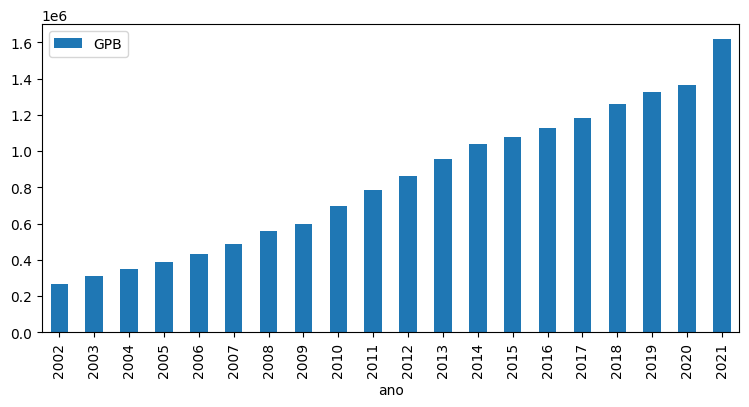

In [ ]:
mun_data.plot.bar(x='ano',figsize=(9,4))

In [ ]:
%%bigquery mun_data --project=insyspo
SELECT ano, AVG(P) AS productivity,
FROM userdb_alysson_mazoni.gdp_mun_ano
GROUP BY ano
ORDER BY ano

Query is running:   0%|          |

Downloading:   0%|          |

(0.92, 0.94)

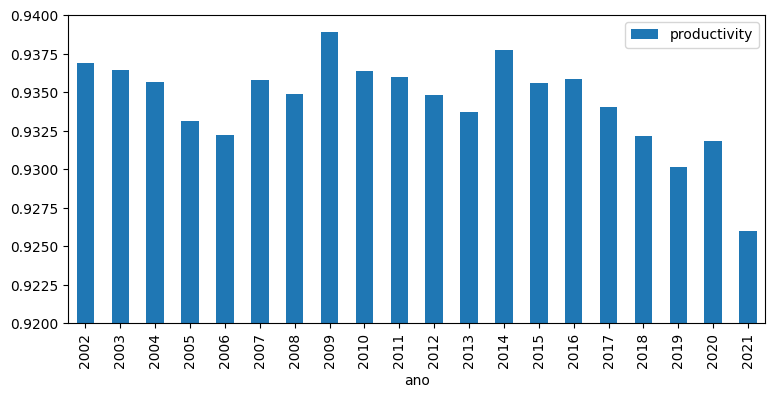

In [ ]:
mun_data.plot.bar(x='ano',figsize=(9,4))
plt.ylim([0.92, 0.94])

In [ ]:
%%bigquery roksw --project=insyspo

SELECT *
FROM  userdb_alysson_mazoni.roks_works
ORDER BY year

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
roksw

,WROK0,WROK1,WROK2,WROK3,WROK4,year
0,38265,1,6,2,8,2002
1,40183,3,8,2,7,2003
2,46665,6,3,2,7,2004
3,52717,5,2,2,5,2005
4,62539,11,5,6,7,2006
5,74274,5,3,7,12,2007
6,85665,11,6,8,12,2008
7,96115,4,2,6,13,2009
8,107959,6,1,5,17,2010
9,122681,9,4,4,25,2011


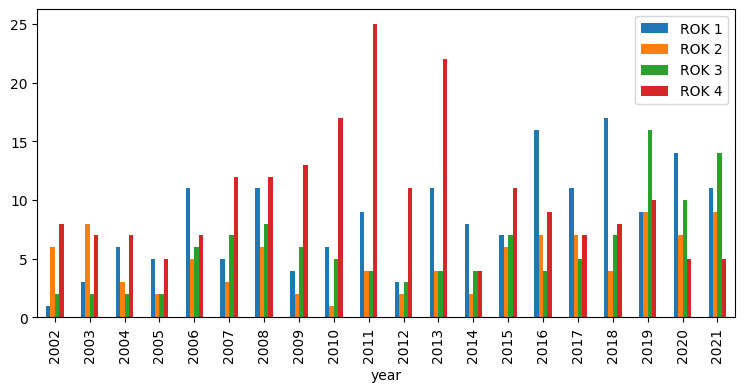

In [ ]:
roksw.iloc[:,1:].plot.bar(x='year',figsize=(9,4))
plt.legend(['ROK 1','ROK 2','ROK 3','ROK 4'])

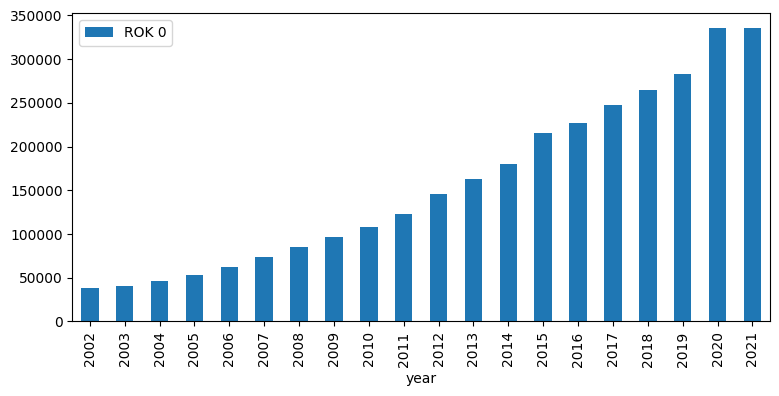

In [ ]:
roksw.loc[:,['year','WROK0']].plot.bar(x='year',figsize=(9,4))
plt.legend(['ROK 0'])

In [ ]:
%%bigquery roksp --project=insyspo

SELECT *
FROM  userdb_alysson_mazoni.roks_patents
ORDER BY year

Query is running:   0%|          |

Downloading:   0%|          |

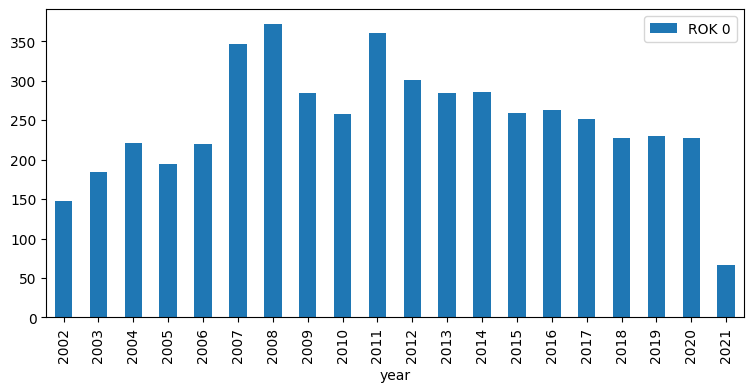

In [ ]:
roksp.loc[:,['year','PROK0']].plot.bar(x='year',figsize=(9,4))
plt.legend(['ROK 0'])

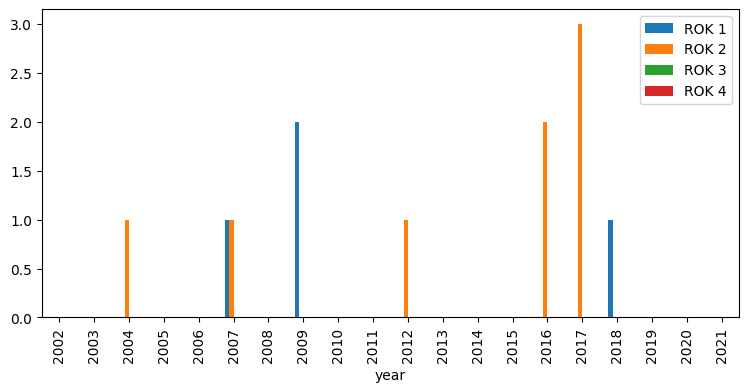

In [ ]:
roksp.iloc[:,1:].plot.bar(x='year',figsize=(9,4))
plt.legend(['ROK 1','ROK 2','ROK 3','ROK 4'])

In [ ]:
%%bigquery data --project=insyspo

SELECT DISTINCT a.ano,
  a.cod_mun,
  PIB,
  P,
  LAG(PIB) OVER(ORDER BY cod_mun,ano) AS PIBa,
  LAG(P) OVER(ORDER BY cod_mun,ano) AS Pa,
  b.* EXCEPT (year), c.* EXCEPT (year)
FROM userdb_alysson_mazoni.gdp_mun_ano AS a
JOIN userdb_alysson_mazoni.roks_works AS b
ON a.ano = b.year
JOIN userdb_alysson_mazoni.roks_patents AS c
ON a.ano = c.year
ORDER BY cod_mun, ano

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
for d in data:
  data[d] = data[d].astype(float)

In [ ]:
df = data.iloc[1:,2:]

In [ ]:
cw_lm=ols('PIB ~ PIBa+Pa+WROK0+WROK1+WROK2+WROK3+WROK4+PROK0+PROK1+PROK2+PROK3+PROK4', data=df).fit()
print(sm.stats.anova_lm(cw_lm, typ=2))

                sum_sq        df              F        PR(>F)
PIBa      7.785026e+18       1.0  816382.853338  0.000000e+00
Pa        1.677172e+14       1.0      17.587797  2.745551e-05
WROK0     2.806437e+13       1.0       2.942992  8.625360e-02
WROK1     4.492616e+14       1.0      47.112167  6.738730e-12
WROK2     7.347778e+14       1.0      77.053046  1.687184e-18
WROK3     5.799147e+14       1.0      60.813213  6.329568e-15
WROK4     1.600280e+10       1.0       0.001678  9.673237e-01
PROK0     1.034821e+14       1.0      10.851727  9.873445e-04
PROK1     8.271564e+13       1.0       8.674041  3.228415e-03
PROK2     1.161879e+14       1.0      12.184137  4.821628e-04
PROK3              NaN       1.0            NaN           NaN
PROK4              NaN       1.0            NaN           NaN
Residual  1.061490e+18  111314.0            NaN           NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '


In [ ]:
cw_lm=ols('P ~ PIBa+Pa+WROK0+WROK1+WROK2+WROK3+WROK4+PROK0+PROK1+PROK2+PROK3+PROK4', data=df).fit()
print(sm.stats.anova_lm(cw_lm, typ=2))

              sum_sq        df            F         PR(>F)
PIBa        2.632068       1.0   584.058707  1.056665e-128
Pa         29.352142       1.0  6513.270665   0.000000e+00
WROK0       0.018854       1.0     4.183638   4.081835e-02
WROK1       0.072439       1.0    16.074391   6.094172e-05
WROK2       0.039448       1.0     8.753650   3.090481e-03
WROK3       0.168435       1.0    37.375862   9.774271e-10
WROK4       0.013422       1.0     2.978398   8.438554e-02
PROK0       0.116311       1.0    25.809566   3.774234e-07
PROK1       0.073414       1.0    16.290716   5.436578e-05
PROK2       0.016875       1.0     3.744534   5.298304e-02
PROK3            NaN       1.0          NaN            NaN
PROK4            NaN       1.0          NaN            NaN
Residual  501.638049  111314.0          NaN            NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
